# Importing modules

In [293]:
import gensim
# import torch
# import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import pandas as pd
import numpy as np
import scipy as spy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 13

# Exploratory Data Analysis

## Import csv file

In [114]:
reviews = pd.read_csv('oneplus_labeled_data.csv', )
reviews_oversampled = pd.read_csv('oneplus_labeled_data_oversampled.csv')

### EDA for Unbalanced dataset

In [115]:
reviews.tail()

,lemmatized,Sentiment
4808,excellent mobile good camera quality battery p...,Positive
4809,need battery optimization future update overal...,Neutral
4810,good battery backup,Neutral
4811,speaker mic quantity good,Neutral
4812,heating issue charge overall phone good,Neutral


So we know that there are some black rows, so let's check for None

In [116]:
reviews.describe()

,lemmatized,Sentiment
count,4802,4813
unique,4687,3
top,good product,Positive
freq,12,2024


In [117]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4813 entries, 0 to 4812
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lemmatized  4802 non-null   object
 1   Sentiment   4813 non-null   object
dtypes: object(2)
memory usage: 75.3+ KB


As we can see there are total 12 None and 125 duplicates (or we can say same reviews posted by peoples)

In [118]:
reviews[reviews.duplicated()]

,lemmatized,Sentiment
2052,nice phone,Neutral
2082,excellent,Neutral
2689,nice phone,Neutral
2727,nice phone,Neutral
2815,good phone,Neutral
...,...,...
4759,NaN,Neutral
4768,bad experience,Negative
4775,heating issue,Neutral
4804,love,Neutral


In [119]:
reviews.isnull().sum()

lemmatized    11
Sentiment      0
dtype: int64

Let's drop the None values so new dataset will be with 4802 rows

In [120]:
reviews = reviews.dropna().reset_index()

In [121]:
reviews.drop('index', axis= 1, inplace= True)

In [122]:
reviews.tail()

,lemmatized,Sentiment
4797,excellent mobile good camera quality battery p...,Positive
4798,need battery optimization future update overal...,Neutral
4799,good battery backup,Neutral
4800,speaker mic quantity good,Neutral
4801,heating issue charge overall phone good,Neutral


In [123]:
reviews['Sentiment'].value_counts()

Positive    2024
Neutral     1963
Negative     815
Name: Sentiment, dtype: int64

In [124]:
reviews_1 = reviews.copy()

### For balanced dataset

In [125]:
reviews_oversampled.tail()

,lemmatized,Sentiment
5608,camera bad,Negative
5609,camera stop work month fast charging isn t wor...,Negative
5610,set clone app whatsapp doneclone whatsapp pr k...,Negative
5611,phone lag 22 storage,Negative
5612,bhai koi bhi plus nord 2 ko mt lena bahut jyad...,Negative


In [126]:
reviews_oversampled.describe()

,lemmatized,Sentiment
count,5602,5613
unique,4687,3
top,good product,Positive
freq,12,2024


In [127]:
reviews_oversampled.isnull().sum()

lemmatized    11
Sentiment      0
dtype: int64

In [128]:
reviews_oversampled.dropna(inplace= True)
reviews_oversampled.reset_index(inplace = True)
reviews_oversampled.drop('index', axis = 1, inplace = True)

In [129]:
reviews_oversampled.isnull().sum()

lemmatized    0
Sentiment     0
dtype: int64

In [130]:
reviews_oversampled.tail()

,lemmatized,Sentiment
5597,camera bad,Negative
5598,camera stop work month fast charging isn t wor...,Negative
5599,set clone app whatsapp doneclone whatsapp pr k...,Negative
5600,phone lag 22 storage,Negative
5601,bhai koi bhi plus nord 2 ko mt lena bahut jyad...,Negative


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

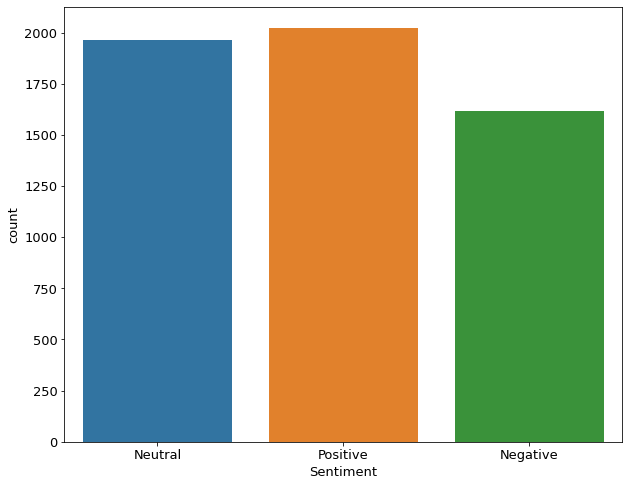

In [131]:
sns.countplot(x = reviews_oversampled['Sentiment'])

In [132]:
reviews_oversampled.duplicated().sum()

915

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

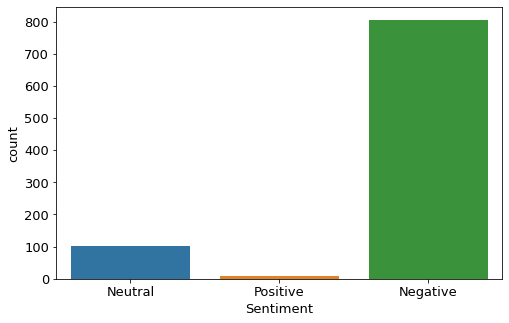

In [133]:
plt.figure(figsize= (8,5))
sns.countplot(x= reviews_oversampled['Sentiment'][reviews_oversampled.duplicated()])

In [134]:
reviews_oversampled_1 = reviews_oversampled.copy()

As we can see from EDA there are total 11 Null values and 915 Duplicates (800, 100, 15 in Negative, Positive and neutral class)

Now we have two datasets balanced and unbalanced. we will test the models on both and then select best dataset for further analysis

## Label encoding

In [135]:
def encoding_labels(dataframe, column_name):
    unique_labels = list(dataframe[column_name].unique())
    unique_labels.sort()
    encode_dict = dict(zip(unique_labels, range(len(unique_labels))))
    dataframe[column_name] = dataframe[column_name].map(encode_dict)
    return encode_dict

In [136]:
label_encode_dict = encoding_labels(reviews_1, 'Sentiment')
label_encode_dict

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [137]:
label_encode_dict = encoding_labels(reviews_oversampled_1, 'Sentiment')
label_encode_dict

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [138]:
reviews_1.tail(10)

,lemmatized,Sentiment
4792,chalenge,1
4793,love,1
4794,awesome phone,2
4795,s awesome,2
4796,phone look great amazing display superfast cha...,2
4797,excellent mobile good camera quality battery p...,2
4798,need battery optimization future update overal...,1
4799,good battery backup,1
4800,speaker mic quantity good,1
4801,heating issue charge overall phone good,1


In [139]:
reviews_oversampled_1.iloc[500:520,:]

,lemmatized,Sentiment
500,phone good switch pixel 2 experience clean ove...,2
501,write review 48 hour usage plus device extensi...,2
502,bad product disappointed dial receive mobile b...,0
503,s near perfect phone use like 90 people use da...,1
504,camera vivo v 21 se good hai charger bahut hi ...,1
505,oneplus mobile confused decision buy finally d...,2
506,device allrounder tick box like 1 design good ...,2
507,record feature inform party big negative play ...,1
508,bad product segmentplz guy don t buy s persona...,0
509,heating issue mobile reach 47 c play bgmi heat...,0


# Train-Test-Val Split

## Train_test-val Split for unbalanced dataset

In [140]:
x_train, x_test, y_train, y_test = train_test_split(reviews_1['lemmatized'], reviews_1['Sentiment'], test_size= 0.2, random_state= 15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.25, random_state=15)

In [141]:
x_train.shape, x_val.shape, x_test.shape

((2880,), (961,), (961,))

In [142]:
y_train.value_counts(), y_test.value_counts(), y_val.value_counts()

(2    1240
 1    1154
 0     486
 Name: Sentiment, dtype: int64,
 1    404
 2    399
 0    158
 Name: Sentiment, dtype: int64,
 1    405
 2    385
 0    171
 Name: Sentiment, dtype: int64)

## Train-Test-Val split for balanced dataset

In [143]:
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(reviews_oversampled_1['lemmatized'], 
        reviews_oversampled_1['Sentiment'], test_size = 0.2, random_state= 15 )
x_train_over, x_val_over, y_train_over, y_val_over = train_test_split(x_train_over, y_train_over, test_size=0.25, random_state= 15)

In [144]:
x_train_over.shape, x_test_over.shape, x_val_over.shape

((3360,), (1121,), (1121,))

In [145]:
y_train_over.value_counts(), y_test_over.value_counts(), y_val_over.value_counts()

(2    1222
 1    1188
 0     950
 Name: Sentiment, dtype: int64,
 2    417
 1    388
 0    316
 Name: Sentiment, dtype: int64,
 1    387
 2    385
 0    349
 Name: Sentiment, dtype: int64)

# User defined Functions

In [146]:
def heat_map_confusion_matrix(y_true, y_pred, annot = True,x_label = None, y_label = None
                    , tickes = 'auto', title = None, label_size = 16):
     '''
     y_true: The True values
     y_pred: The predicted values given by model
     annot: Bool, for showing Annotations
     x_label, y_label: str, x-axis labels and y_axis labels i.e (Predicted values and True values)
     tickes: List of x and y axis tickes
     title: str, The title of heatmap
     '''
     
     # if tickes is None:
     #      tickes = y_true.unique()
     ax=sns.heatmap(confusion_matrix(y_true, y_pred), annot= annot, cmap= sns.dark_palette('purple'),
          fmt = 'd', xticklabels= tickes, yticklabels= tickes)
     plt.title(title, fontsize = 20)
     plt.xlabel(x_label, fontsize = label_size)
     plt.ylabel(y_label, fontsize = label_size)
    

In [147]:
def f1_score_fun(x_true, y_true, model,dataset_type, average = 'macro', ):
    y_pred = model.predict(x_true)
    score = f1_score(y_true, y_pred, average= average)
    print(f'F1 score for {dataset_type} is {score}')

# Word vector or Word embedding

As we know that, to train the Machine learning model, we need numbers, so that model can learn. 
But the case of text data, the data is in format of string. so we need to convert them into Numbers.

There are various methods that are used for conversion of text data into numerical form, which are given below:
1. OneHot encoding
2. Co-occurance matrix
3. Word count (Countvectorizer)
4. TF-IDF (Term frequency - Inverse Document frequency)
5. Word2vec
6. GloVe

## Experiment

In [148]:
# reviews_array = reviews_1.lemmatized.values
# tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words= 5000)
# tokenizer.fit_on_texts(reviews_array)
# encoded_docs = tokenizer.texts_to_sequences(reviews_array)
# comb_list = []
# for list_ in encoded_docs:
#     for num in list_:
#         comb_list.append(num)
# a=list(set(comb_list))
# a.sort

In [149]:
# a=tokenizer.get_config()['word_counts']

In [150]:
# import json
# dict_count = json.loads(a)

In [151]:
# x=list(dict_count.values())

In [152]:
# x.sort()

In [153]:
# x[7256], dict_count['phone']

In [154]:
# def encoding_text_to_numbers(dataframe,colm_name, dict):
#     encode_list = []
#     list_of_words = list(dataframe[colm_name])
#     for string in list_of_words:
#         pass

## CountVectorizer

In [155]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
x_train_count_transform = count_vectorizer.fit_transform(x_train)

In [156]:
x_val_count_transform = count_vectorizer.transform(x_val)

In [157]:
# Hence there are total 5499 words
x_train_count_transform.shape, y_train.shape, x_val_count_transform.shape

((2880, 5499), (2880,), (961, 5499))

### Logistic model for experiment

In [158]:
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter= 500), x_train_count_transform, y_train, cv = 5)

In [159]:
print(scores)
print(f'Mean cross-validation-score is: {np.mean(scores)}')

[0.8125     0.85069444 0.83506944 0.84722222 0.81076389]
Mean cross-validation-score is: 0.83125


In [160]:
logt_model = LogisticRegression(max_iter= 500, )
logt_model = logt_model.fit(x_train_count_transform, y_train)

In [161]:
logt_model.score(x_train_count_transform, y_train)

0.9892361111111111

In [162]:
logt_model.score(x_val_count_transform, y_val)

0.8407908428720083

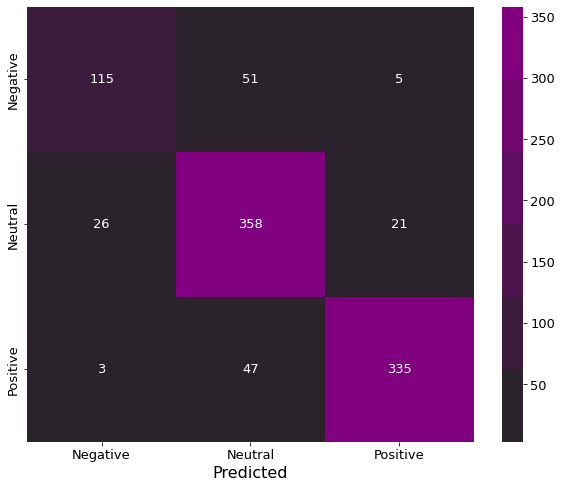

In [163]:
heat_map_confusion_matrix(y_val, logt_model.predict(x_val_count_transform), 
        x_label = 'Predicted', tickes= list(label_encode_dict.keys()))

In [164]:
print(classification_report(y_val, logt_model.predict(x_val_count_transform)))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       171
           1       0.79      0.88      0.83       405
           2       0.93      0.87      0.90       385

    accuracy                           0.84       961
   macro avg       0.84      0.81      0.82       961
weighted avg       0.84      0.84      0.84       961



In [165]:
y_pred_prob = logt_model.predict_proba(x_val_count_transform) 
y_pred_prob[:,1]

array([5.75689571e-01, 5.00506612e-04, 3.32633705e-03, 5.64596139e-02,
       1.89607974e-01, 7.80345863e-02, 1.82848548e-02, 6.98196874e-01,
       1.18640831e-01, 3.56559713e-03, 1.41323430e-02, 9.00846182e-01,
       6.71194988e-02, 6.86936842e-05, 3.02296089e-02, 1.46793506e-01,
       1.70785197e-01, 8.79745118e-01, 2.58957489e-02, 8.58632305e-01,
       6.48947866e-03, 2.69588125e-11, 1.62981790e-01, 9.82919189e-03,
       9.48807552e-01, 8.99563797e-06, 8.38271671e-01, 2.28643930e-01,
       7.70263137e-01, 7.40019583e-01, 4.61177868e-02, 9.87061370e-01,
       7.03751106e-01, 5.09491318e-07, 9.23421714e-01, 7.51132610e-01,
       6.86028229e-01, 1.21267821e-01, 8.18336301e-02, 3.50882661e-02,
       8.15380672e-01, 3.65279753e-01, 8.59570879e-01, 1.39887779e-01,
       2.77983058e-01, 7.90628127e-01, 8.08944284e-01, 2.41211191e-01,
       9.58125520e-01, 1.52102353e-01, 9.71928206e-01, 4.76829014e-01,
       9.69516441e-01, 2.17135516e-01, 7.70777937e-01, 2.40385791e-03,
      

In [166]:
y_pred_prob[:,1]

array([5.75689571e-01, 5.00506612e-04, 3.32633705e-03, 5.64596139e-02,
       1.89607974e-01, 7.80345863e-02, 1.82848548e-02, 6.98196874e-01,
       1.18640831e-01, 3.56559713e-03, 1.41323430e-02, 9.00846182e-01,
       6.71194988e-02, 6.86936842e-05, 3.02296089e-02, 1.46793506e-01,
       1.70785197e-01, 8.79745118e-01, 2.58957489e-02, 8.58632305e-01,
       6.48947866e-03, 2.69588125e-11, 1.62981790e-01, 9.82919189e-03,
       9.48807552e-01, 8.99563797e-06, 8.38271671e-01, 2.28643930e-01,
       7.70263137e-01, 7.40019583e-01, 4.61177868e-02, 9.87061370e-01,
       7.03751106e-01, 5.09491318e-07, 9.23421714e-01, 7.51132610e-01,
       6.86028229e-01, 1.21267821e-01, 8.18336301e-02, 3.50882661e-02,
       8.15380672e-01, 3.65279753e-01, 8.59570879e-01, 1.39887779e-01,
       2.77983058e-01, 7.90628127e-01, 8.08944284e-01, 2.41211191e-01,
       9.58125520e-01, 1.52102353e-01, 9.71928206e-01, 4.76829014e-01,
       9.69516441e-01, 2.17135516e-01, 7.70777937e-01, 2.40385791e-03,
      

In [167]:
y_pred_prob.shape

(961, 3)

In [168]:
y_pred_prob[y_pred_prob>0.5].shape

(949,)

In [169]:
# print(classification_report(y_val, y_pred))

## Word2Vec

In [170]:
file = open('list_of_list_tokens.pkl', 'rb')
list_of_list_reviews = pickle.load(file)

In [171]:
from gensim.models import Word2Vec

In [172]:
word2vec = Word2Vec(sentences= list_of_list_reviews)

## TF-IDF Vectorizer

In [173]:
tf_idf_vectorizer = TfidfVectorizer()
x_train_tfidf = tf_idf_vectorizer.fit_transform(x_train)

In [174]:
x_val_tfidf = tf_idf_vectorizer.transform(x_val)

In [175]:
logit_model_tfidf = LogisticRegression(max_iter= 400)
logit_model_tfidf = logit_model_tfidf.fit(x_train_tfidf, y_train)

In [176]:
logit_model_tfidf.score(x_train_tfidf, y_train)

0.884375

In [177]:
logit_model_tfidf.score(x_val_tfidf, y_val)

0.7273673257023934

# Model Building

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, f1_score

import joblib
import pickle

## Logistic Model Countvectorizer

### one-gram model

#### Logistic Model 1

##### On Unbalanced_dataset

In [179]:
logit_pipeline = Pipeline([('countvectorizer', CountVectorizer()), ('logistic', LogisticRegression(max_iter= 200))])
logit_pipeline.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logistic', LogisticRegression(max_iter=200))])

In [180]:
print(f'The training score is {logit_pipeline.score(x_train, y_train)}')
print(f'The testing score is {logit_pipeline.score(x_val, y_val)}')

The training score is 0.9892361111111111
The testing score is 0.8407908428720083


In [181]:
logit_pipeline.predict(x_train)

array([0, 0, 1, ..., 1, 2, 0], dtype=int64)

In [182]:
print(classification_report(y_train, logit_pipeline.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       486
           1       0.98      1.00      0.99      1154
           2       1.00      0.99      1.00      1240

    accuracy                           0.99      2880
   macro avg       0.99      0.98      0.99      2880
weighted avg       0.99      0.99      0.99      2880



In [183]:
print(classification_report(y_val, logit_pipeline.predict(x_val) ))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       171
           1       0.79      0.88      0.83       405
           2       0.93      0.87      0.90       385

    accuracy                           0.84       961
   macro avg       0.84      0.81      0.82       961
weighted avg       0.84      0.84      0.84       961



So we can see that model is overfitting, so let's try grid search

##### On Balanced dataset

In [184]:
logit_pipeline_balanced = make_pipeline(CountVectorizer(), LogisticRegression(max_iter= 200))
logit_pipeline_balanced.fit(x_train_over, y_train_over)
f1_score_fun(x_train_over, y_train_over, logit_pipeline_balanced, 'Training')
f1_score_fun(x_val_over, y_val_over, logit_pipeline_balanced, 'Validation')

F1 score for Training is 0.9908519696591463
F1 score for Validation is 0.8731144283205472


In [185]:
print(classification_report(y_train_over, logit_pipeline_balanced.predict(x_train_over)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       950
           1       0.98      1.00      0.99      1188
           2       1.00      0.99      0.99      1222

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360



In [186]:
print(classification_report(y_val_over, logit_pipeline_balanced.predict(x_val_over) ))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       349
           1       0.80      0.85      0.82       387
           2       0.94      0.87      0.90       385

    accuracy                           0.87      1121
   macro avg       0.88      0.87      0.87      1121
weighted avg       0.87      0.87      0.87      1121



#### Grid search

In [189]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [197]:
param_grid = {'logistic__C': [0.01,0.1,1,10,100], 'logistic__max_iter':[500,800,1000], 
                'logistic__tol': [1e-2,1e-3,1e-4,1e-5, 1e-6]}  # please not that there is double underscore (__)

##### On Unbalanced dataset

In [201]:
logit_pipeline_gridsearch = Pipeline([('countvectorizer', CountVectorizer()), ('logistic', LogisticRegression())])
grid = GridSearchCV(logit_pipeline_gridsearch, param_grid = param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 10, 100],
                         'logistic__max_iter': [500, 800, 1000],
                         'logistic__tol': [0.01, 0.001, 0.0001, 1e-05, 1e-06]})

In [202]:
grid.best_params_, grid.best_score_

({'logistic__C': 100, 'logistic__max_iter': 500, 'logistic__tol': 0.01},
 0.8447916666666666)

In [193]:
logit_pipeline_best_param = Pipeline(steps= [('countvectorizer', CountVectorizer()),
 ('logistic', LogisticRegression(C = 100, max_iter= 500, tol= 0.001))])
logit_pipeline_best_param.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logistic',
                 LogisticRegression(C=100, max_iter=500, tol=0.001))])

In [194]:
print(f'The training score is {logit_pipeline_best_param.score(x_train, y_train)}')
print(f'The testing score is {logit_pipeline_best_param.score(x_val, y_val)}')

The training score is 1.0
The testing score is 0.850156087408949


In [265]:
print(classification_report(y_train, logit_pipeline_best_param.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00      1154
           2       1.00      1.00      1.00      1240

    accuracy                           1.00      2880
   macro avg       1.00      1.00      1.00      2880
weighted avg       1.00      1.00      1.00      2880



In [264]:
print(classification_report(y_val, logit_pipeline_best_param.predict(x_val)))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       171
           1       0.82      0.86      0.84       405
           2       0.91      0.89      0.90       385

    accuracy                           0.85       961
   macro avg       0.84      0.83      0.83       961
weighted avg       0.85      0.85      0.85       961



As we can see the unbalanced dataset, tends to bais more toward Positive review 

##### On Balanced Dataset

In [200]:
logit_pipeline_gridsearch_balanced = Pipeline([('countvectorizer', CountVectorizer()), ('logistic', LogisticRegression())])
grid_balanced = GridSearchCV(logit_pipeline_gridsearch_balanced, param_grid = param_grid)
grid_balanced.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 10, 100],
                         'logistic__max_iter': [500, 800, 1000],
                         'logistic__tol': [0.01, 0.001, 0.0001, 1e-05, 1e-06]})

In [203]:
grid_balanced.best_params_, grid_balanced.best_score_

({'logistic__C': 100, 'logistic__max_iter': 500, 'logistic__tol': 0.01},
 0.8447916666666666)

In [234]:
grid_balanced_scores = pd.DataFrame(grid_balanced.cv_results_)
grid_balanced_scores = grid_balanced_scores[['param_logistic__C', 'param_logistic__max_iter', 'mean_test_score', 'param_logistic__tol']]
grid_balanced_scores.tail()

,param_logistic__C,param_logistic__max_iter,mean_test_score,param_logistic__tol
70,100,1000,0.844792,0.01
71,100,1000,0.844792,0.001
72,100,1000,0.844792,0.0001
73,100,1000,0.844792,0.00001
74,100,1000,0.844792,0.000001


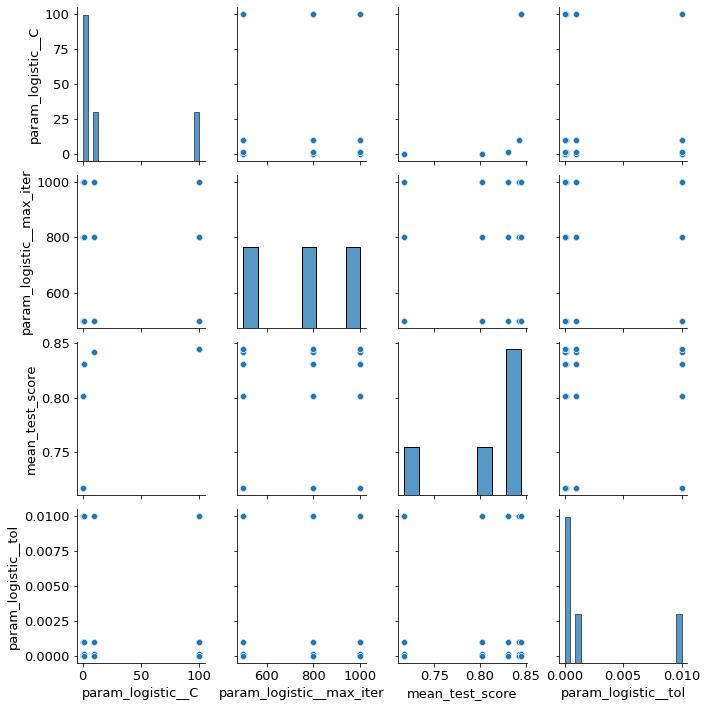

In [241]:
sns.pairplot(grid_balanced_scores)

In [259]:
logit_pipeline_best_param_balanced = make_pipeline(CountVectorizer(), LogisticRegression(C = 100, max_iter= 500, tol= 0.01))
logit_pipeline_best_param_balanced.fit(x_train_over, y_train_over)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(C=100, max_iter=500, tol=0.01))])

In [338]:
logit_pipeline_best_param_balanced.predict(['phone overall great os lot bug like 1 day cloner app instal whatsapp suddenly gets remove late update show app instal cloner applicable expect oneplus software sort target premium range user'])

array([2], dtype=int64)

In [261]:
f1_score_fun(x_train_over, y_train_over, logit_pipeline_best_param_balanced, 'Training')
f1_score_fun(x_val_over, y_val_over, logit_pipeline_best_param_balanced, 'Validation')

F1 score for Training is 1.0
F1 score for Validation is 0.8830552833251484


In [263]:
print(classification_report(y_train_over, logit_pipeline_best_param_balanced.predict(x_train_over)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       950
           1       1.00      1.00      1.00      1188
           2       1.00      1.00      1.00      1222

    accuracy                           1.00      3360
   macro avg       1.00      1.00      1.00      3360
weighted avg       1.00      1.00      1.00      3360



In [262]:
print(classification_report(y_val_over, logit_pipeline_best_param_balanced.predict(x_val_over)))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       349
           1       0.83      0.84      0.84       387
           2       0.93      0.91      0.92       385

    accuracy                           0.88      1121
   macro avg       0.88      0.88      0.88      1121
weighted avg       0.88      0.88      0.88      1121



#### Logistic Model 2

##### On Unbalanced

In [59]:
logit_pipeline_2 = make_pipeline(CountVectorizer(),LogisticRegression(C = 1, max_iter= 500))
logit_pipeline_2.fit(x_train, y_train)
print(f'The training score is {logit_pipeline_2.score(x_train, y_train)}')
print(f'The testing score is {logit_pipeline_2.score(x_val, y_val)}')

The training score is 0.9892361111111111
The testing score is 0.8407908428720083


In [60]:
f1_score_fun(x_train, y_train, logit_pipeline_2, 'Traning')
f1_score_fun(x_val, y_val, logit_pipeline_2, 'Validation')

F1 score for Traning is 0.9873233937277867
F1 score for Validation is 0.8199577425367002


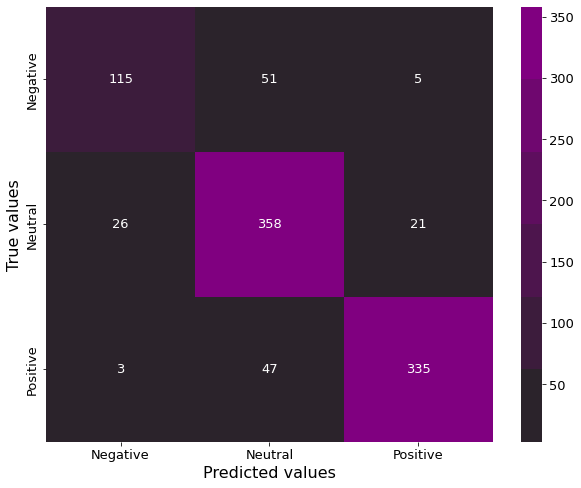

In [61]:
heat_map_confusion_matrix(y_val, logit_pipeline_2.predict(x_val), 
    tickes= list(label_encode_dict.keys()), x_label= 'Predicted values', y_label = 'True values', )

In [62]:
print(classification_report(y_val, logit_pipeline_2.predict(x_val)))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       171
           1       0.79      0.88      0.83       405
           2       0.93      0.87      0.90       385

    accuracy                           0.84       961
   macro avg       0.84      0.81      0.82       961
weighted avg       0.84      0.84      0.84       961



In [63]:
precision, recall, threshold = precision_recall_curve(y_val, logit_pipeline_2.predict_proba(x_val)[:,0], pos_label= 0)

In [64]:
close_zero = np.argmin(np.abs(threshold))

Text(0.5, 0, 'Precision')

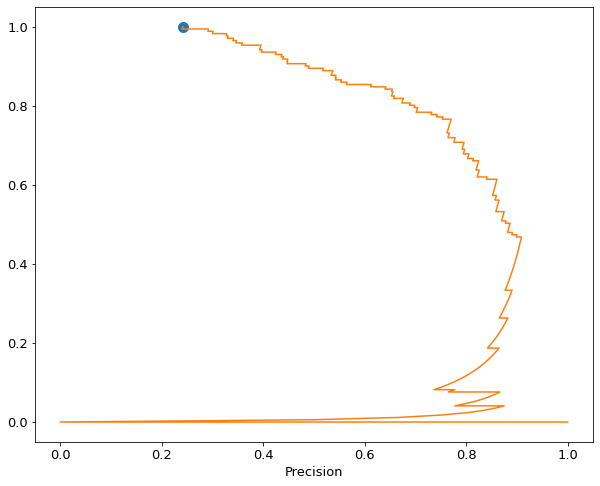

In [65]:
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = 'threshold zero')
plt.plot(precision, recall, label = 'Precision-Recall curve')
plt.xlabel('Precision')

##### On Balanced dataset

From Grid Search, we have the best parameter but using those gives us 100% on training and highest on validation
so we choose to use more strong regularization C = 0.5

In [270]:
logit_pipeline_2_balanced = make_pipeline(CountVectorizer(), LogisticRegression(C = 0.5, max_iter= 500, tol = 0.001 ))
logit_pipeline_2_balanced.fit(x_train_over, y_train_over)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(C=0.5, max_iter=500, tol=0.001))])

In [271]:
f1_score_fun(x_train_over, y_train_over, logit_pipeline_2_balanced, 'Training')
f1_score_fun(x_val_over, y_val_over, logit_pipeline_2_balanced, 'Validation' )

F1 score for Training is 0.9773953945003807
F1 score for Validation is 0.8555746408099437


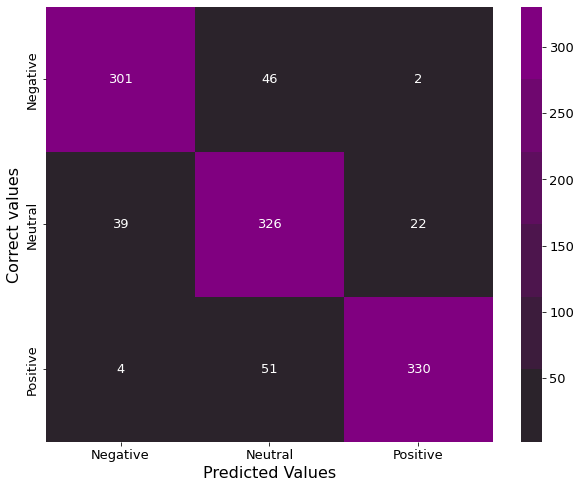

In [276]:
heat_map_confusion_matrix(y_val_over, logit_pipeline_2_balanced.predict(x_val_over), tickes= label_encode_dict.keys()
    , x_label= 'Predicted Values', y_label = 'Correct values')

In [277]:
print(classification_report(y_val_over, logit_pipeline_2_balanced.predict(x_val_over)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       349
           1       0.77      0.84      0.80       387
           2       0.93      0.86      0.89       385

    accuracy                           0.85      1121
   macro avg       0.86      0.85      0.86      1121
weighted avg       0.86      0.85      0.86      1121



As we can see, this scores are uniform, there is no big difference in between classes. 

So we going to finalize this logistic model on balance dataset

### Grid Search on N-gram and Logistic parameters

In [280]:
logit_pipeline_n_gram_unbalanced = make_pipeline(CountVectorizer(), LogisticRegression())

In [290]:
params = {'logisticregression__C': [0.01,0.1,1,10,100], 'logisticregression__max_iter':[500], 
        'logisticregression__tol': [1e-2,1e-3,1e-4], 'countvectorizer__ngram_range': [(2,2),(3,3)]}

In [291]:
grid_n_gram = GridSearchCV(logit_pipeline_n_gram_unbalanced, param_grid= params)
grid_n_gram.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'countvectorizer__ngram_range': [(2, 2), (3, 3)],
                         'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__max_iter': [500],
                         'logisticregression__tol': [0.01, 0.001, 0.0001]})

In [313]:
grid_n_gram.best_params_, grid_n_gram.best_score_

({'countvectorizer__ngram_range': (2, 2),
  'logisticregression__C': 1,
  'logisticregression__max_iter': 500,
  'logisticregression__tol': 0.01},
 0.6579861111111112)

### Bi-gram model and tri-gram model

#### Logistic model 1

As we learn from previous models, that the unbalance dataset is getting baised toward positive class, 

so now we are training our next models only on balanced dataset

In [295]:
logit_pipeline_bigram = make_pipeline(CountVectorizer(ngram_range= (2,2)), LogisticRegression(max_iter= 500))
logit_pipeline_bigram.fit(x_train_over, y_train_over)
f1_score_fun(x_train_over, y_train_over, logit_pipeline_bigram, 'Training')
f1_score_fun(x_val_over, y_val_over, logit_pipeline_bigram, 'Validation')

F1 score for Training is 0.9919538808299929
F1 score for Validation is 0.7438099440417013


The F1 score for validation is pretity bad, so lets move to GridSearch

#### Grid Search

In [300]:
logit_pipeline_bigram_gridsearch = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=500 ))

In [301]:
params = {'logisticregression__C': [0.01,0.1,10,100], 'logisticregression__tol': [1e-3,1e-4], 
    'countvectorizer__ngram_range': [(1,2),(2,2)]}
grid_bigram_logit = GridSearchCV(logit_pipeline_bigram_gridsearch, params)
grid_bigram_logit.fit(x_train_over, y_train_over)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500))]),
             param_grid={'countvectorizer__ngram_range': [(1, 2), (2, 2)],
                         'logisticregression__C': [0.01, 0.1, 10, 100],
                         'logisticregression__tol': [0.001, 0.0001]})

In [302]:
grid_bigram_logit.best_params_, grid_bigram_logit.best_score_

({'countvectorizer__ngram_range': (1, 2),
  'logisticregression__C': 10,
  'logisticregression__tol': 0.001},
 0.8452380952380952)

In [303]:
logit_pipeline_bigram_best_param = make_pipeline(CountVectorizer(ngram_range= (1,2)), LogisticRegression(C = 10, tol = 0.001, max_iter= 500))
logit_pipeline_bigram_best_param.fit(x_train_over, y_train_over)
f1_score_fun(x_train_over, y_train_over, logit_pipeline_bigram_best_param, 'Training')
f1_score_fun(x_val_over, y_val_over, logit_pipeline_bigram_best_param, 'Validation')

F1 score for Training is 1.0
F1 score for Validation is 0.8662111713968484


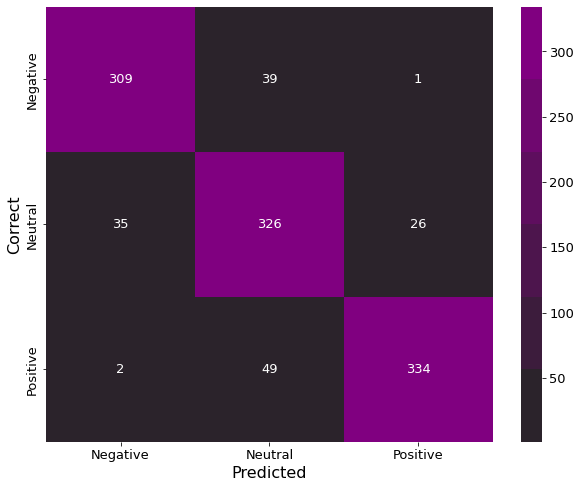

In [305]:
heat_map_confusion_matrix(y_val_over, logit_pipeline_bigram_best_param.predict(x_val_over), tickes= label_encode_dict.keys()
    ,x_label= 'Predicted', y_label= 'Correct')

In [306]:
print(classification_report(y_val_over, logit_pipeline_bigram_best_param.predict(x_val_over)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       349
           1       0.79      0.84      0.81       387
           2       0.93      0.87      0.90       385

    accuracy                           0.86      1121
   macro avg       0.87      0.87      0.87      1121
weighted avg       0.87      0.86      0.87      1121



#### Logistic model 2

In [310]:
logit_pipeline_bigram_2 = make_pipeline(CountVectorizer(ngram_range= (1,2)), LogisticRegression(C = 0.1, tol = 0.001, max_iter= 500))
logit_pipeline_bigram_2.fit(x_train_over, y_train_over)
f1_score_fun(x_train_over, y_train_over, logit_pipeline_bigram_2, 'Training')
f1_score_fun(x_val_over, y_val_over, logit_pipeline_bigram_2, 'Validation')

F1 score for Training is 0.97133759153109
F1 score for Validation is 0.8374799240131132


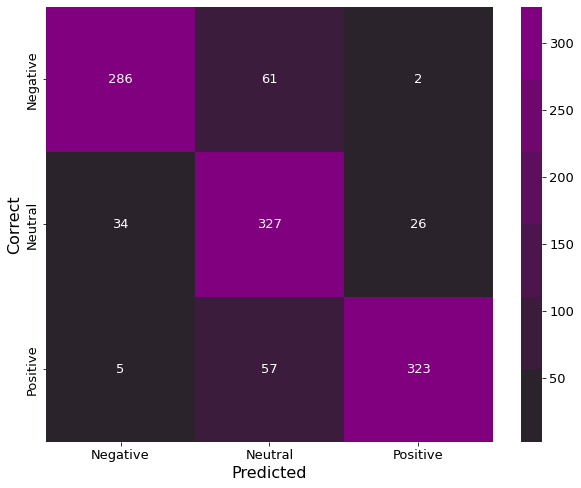

In [311]:
heat_map_confusion_matrix(y_val_over, logit_pipeline_bigram_2.predict(x_val_over), tickes= label_encode_dict.keys()
    ,x_label= 'Predicted', y_label= 'Correct')

In [312]:
print(classification_report(y_val_over, logit_pipeline_bigram_2.predict(x_val_over)))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       349
           1       0.73      0.84      0.79       387
           2       0.92      0.84      0.88       385

    accuracy                           0.83      1121
   macro avg       0.85      0.83      0.84      1121
weighted avg       0.84      0.83      0.84      1121



### Tri-gram model

#### Logistic model 1

In [314]:
logit_pipeline_trigram = make_pipeline(CountVectorizer(ngram_range= (3,3)), LogisticRegression(max_iter=500))
logit_pipeline_trigram.fit(x_train_over, y_train_over)
f1_score_fun(x_train_over, y_train_over, logit_pipeline_trigram, 'Training')
f1_score_fun(x_val_over, y_val_over, logit_pipeline_trigram, 'Validation')

F1 score for Training is 0.977149625977528
F1 score for Validation is 0.6128195904200108


Very bad validation score, so are not going for trigram model, so now lets check on testing dataset

### Final test

In [315]:
f1_score_fun(x_test_over, y_test_over, logit_pipeline_balanced, 'Testing of onegram model 1')
f1_score_fun(x_test_over, y_test_over, logit_pipeline_2_balanced, 'Testing of onegram model 2')
f1_score_fun(x_test_over, y_test_over, logit_pipeline_bigram_2, 'Testing of one+bi-gram model2')
# f1_score_fun(x_test_over, y_test_over, logit_pipeline_bigram_2, 'Testing of bi-gram model2')

F1 score for Testing of onegram model 1 is 0.8626437525918309
F1 score for Testing of onegram model 2 is 0.8548779947789247
F1 score for Testing of one+bi-gram model2 is 0.8235090074152249


Also as we know the onegram model1 is getting 99% accuracy on training, so it is somewhat overfitting on training, so we are going forward with **onegram model 2**

In [318]:
joblib.dump(logit_pipeline_2_balanced, 'Model_files/logistic_model.joblib')

['Model_files/logistic_model.joblib']

In [339]:
joblib.dump(logit_pipeline_bigram_2, 'Model_files/logistic_bigram.joblib')

['Model_files/logistic_bigram.joblib']

## Logistic Model TF-IDF

#### Logistic model 1

In [321]:
logit_pipeline_tfidf = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter= 500))
logit_pipeline_tfidf.fit(x_train_over, y_train_over)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [322]:
f1_score_fun(x_train_over, y_train_over, logit_pipeline_tfidf, 'Training')
f1_score_fun(x_val_over, y_val_over, logit_pipeline_tfidf, 'Validation' )

F1 score for Training is 0.9134740010637096
F1 score for Validation is 0.7856353954670814


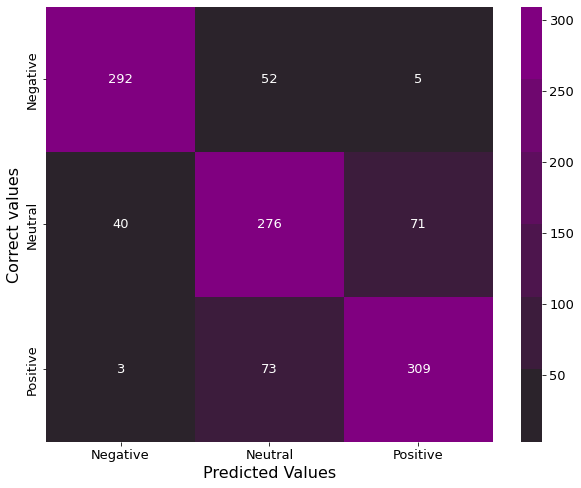

In [323]:
heat_map_confusion_matrix(y_val_over, logit_pipeline_tfidf.predict(x_val_over), tickes= label_encode_dict.keys()
    , x_label= 'Predicted Values', y_label = 'Correct values')

In [324]:
print(classification_report(y_val_over, logit_pipeline_tfidf.predict(x_val_over)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       349
           1       0.69      0.71      0.70       387
           2       0.80      0.80      0.80       385

    accuracy                           0.78      1121
   macro avg       0.79      0.78      0.79      1121
weighted avg       0.78      0.78      0.78      1121



### Grid Search

In [326]:
TfidfVectorizer().get_params(), LogisticRegression().get_params()

({'analyzer': 'word',
  'binary': False,
  'decode_error': 'strict',
  'dtype': numpy.float64,
  'encoding': 'utf-8',
  'input': 'content',
  'lowercase': True,
  'max_df': 1.0,
  'max_features': None,
  'min_df': 1,
  'ngram_range': (1, 1),
  'norm': 'l2',
  'preprocessor': None,
  'smooth_idf': True,
  'stop_words': None,
  'strip_accents': None,
  'sublinear_tf': False,
  'token_pattern': '(?u)\\b\\w\\w+\\b',
  'tokenizer': None,
  'use_idf': True,
  'vocabulary': None},
 {'C': 1.0,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': None,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False})

In [327]:
logit_pipeline_grid_tfidf = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter= 500))
param = {'tfidfvectorizer__ngram_range': [(1,1),(1,2),(2,2)], 'tfidfvectorizer__min_df' :[1,5,10],
    'logisticregression__C': [100,10,0.1,0.01]}
grid_tfidf = GridSearchCV(logit_pipeline_grid_tfidf, param)
grid_tfidf.fit(x_train_over, y_train_over)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500))]),
             param_grid={'logisticregression__C': [100, 10, 0.1, 0.01],
                         'tfidfvectorizer__min_df': [1, 5, 10],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2)]})

In [328]:
grid_tfidf.best_score_, grid_tfidf.best_params_ 

(0.8098214285714285,
 {'logisticregression__C': 10,
  'tfidfvectorizer__min_df': 10,
  'tfidfvectorizer__ngram_range': (1, 1)})

In [343]:
logit_pipeline_tfidf2 = make_pipeline(TfidfVectorizer(ngram_range= (1,1), min_df= 10), LogisticRegression(C = 10, max_iter= 500))
logit_pipeline_tfidf2.fit(x_train_over, y_train_over)
f1_score_fun(x_train, y_train, logit_pipeline_tfidf2, 'Training' )
f1_score_fun(x_val_over, y_val_over, logit_pipeline_tfidf2, 'Validation' )

F1 score for Training is 0.8925145190865024
F1 score for Validation is 0.8095487127450598


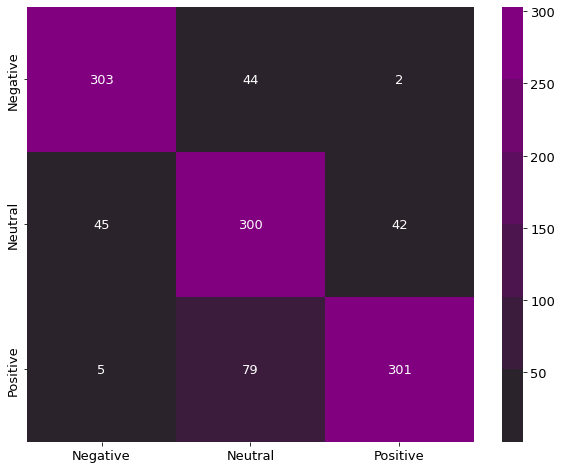

In [345]:
heat_map_confusion_matrix(y_val_over, logit_pipeline_tfidf2.predict(x_val_over), tickes= label_encode_dict.keys())

In [346]:
print(classification_report(y_val_over, logit_pipeline_tfidf2.predict(x_val_over)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       349
           1       0.71      0.78      0.74       387
           2       0.87      0.78      0.82       385

    accuracy                           0.81      1121
   macro avg       0.81      0.81      0.81      1121
weighted avg       0.81      0.81      0.81      1121



In [348]:
f1_score_fun(x_test_over, y_test_over, logit_pipeline_tfidf2, 'Testing')

F1 score for Testing is 0.821212381793687


As we can see the Logistic model using TF-IDF vectorizer is not giving better accuracy that Countvectorizer.

So we are going to finalize the previous Logistic model